# Overview 
In this report, we aim to perform statistical analysis of the model output. This includes decomposition in Empirical Orthogonnal Functions (EOFs).

## 1. Climate Data
Climate data in nature involve a high number of dimensions and variables with nonlinear behavior. Analyzing these data and extracting features and patterns can be challenging. A common way to reduce the dimensionality while retaining the interesting or significant part of the data is to analyze the main component of the data. For this purpose, the principal component analysis (PCA) and empirical orthogonal functions (EOF) have been introduced to climatological applications. Since almost two decades ago, EOFs have been used to extract modes of variability in the data. Here, we intend to apply the EOFs to a sample data and extract the leading components of analysis.

## 2. Empirical Orthogonal Functions (EOFs)
As mentioned before, EOFs are used to understand spatial modes of variability and to study their change over time. One example is North Atlantic Oscillation or NAO index which is the leading EOF of sea level pressure anomaly. Basically, the pressure field is divided into independent (orthogonal) modes. These modes, like NAO, are often interpreted as physical modes. Now care should be taken in these interpretations. The reason is that EOF analysis does not have physical basis and there is not known hypothesis derived from some sort of probability distribution.

One of the advantage of using EOFs analysis is that it allows to study the structure of the variability inside the data as well as exploring the possible meaningful relationship among the variables. 

Main limitation of physical interpretation of EOF-based indices are that (a) atmospheric and oceanic systems are not always orthogonal (they might exhibit different patterns if the study area is changed) and (b) they depend on any strength or weakness in the data and gridding scheme [2]. Despite these limitations, EOFs-based indices are still popular and desirable to represent more complete spatial patterns of variability.

## 3. The EOF Fundamental Equation
Suppose we have a dataset $(D)$ that is a function of space $(s)$ and time $(t)$. Then, using orthogonality property, the this dataset can be written as: 
\begin{equation}
D(t,s) = \sum_{k=1}^N e_k(s) P_k (t)  
\end{equation}
where $e_k(s)$ is the eigenvector or EOF describing the spatial mode (structure) at each time in series, and $P_k(t)$ is the eigenvalue or principle component describing the amplitude of EOFs. As seen in this equation, the space and time dimensions in the original time series has been divided in two separate arrays. This is where, as discussed before, the physical interpretation of EOFs become a bit tricky. 

## 4. Brief on Theory
A typical variable (e.g. temperature $T$) in a time series dataset has 4 dimensions: three in space $\big[(x_1,...x_i)$, $(y_1,...y_j)$, $(z_1,...z_k)\big]$, and one in time $\big[(t_1,...t_n)\big]$. To make the math simpler, it is essential to focus only on the region of interest and subset the data. In addition, to have a faster computation, one may transform the data into only two dimensional matrix. This means, for instance, choose a specific z and and define $s$ as space dimension that has $q = i*j$ elements. Therefore, the new matrix of data has $t$ rows and $q$ columns. Basically, each column has the values of the variable (e.g. temperature values) in all time for a specific grid. Therefore, averaging over each column and subtracting that average value from each point in the column results in anomaly matrix:   

\begin{equation}
D = 
\begin{bmatrix}
    T_{11} & T_{12} & T_{13} & \dots  & T_{1q} \\
    T_{21} & T_{22} & T_{23} & \dots  & T_{2q} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    T_{n1} & T_{n2} & T_{n3} & \dots  & T_{nq}
\end{bmatrix}
\end{equation}

From here, researchers have applied two methods to compute the EOFs. One method is based on calculating the covariance matrix and is called classical EOFs analysis. To increase the performance and reduce some of the challenges associated with classical EOFs analysis, a second method has been suggested based on singular value decomposition (SVD) of data. This method is called rotational EOFs (REOFs) or extended EOFs (EEOFs). Some studies use the second method because they think it will help to come up with physical interpretation of data, in comparison to the first method. We briefly go over the mathematical basis of these two methods.    

### 4.1 Method (1): Using Covariance Matrix
In this method, to build up new set of variables, we need to know the variance among the data and then find linear combination of current variables. To do so, it is necessary to build the covariance matrix first. By computing the eigenvalues, the eigenvectors of covarince matrix will be the EOFs. The covariance matrix is symmetric and positive semidefinite. Therefore, the principle components (eigenvalues) are positive numbers. 

Now the covariance matrix, $\Sigma$, can be computed using the transpose matrix of $D$. To find the maximum variance, one should solve the eigenvalue problem: 
\begin{equation}
\Sigma e  = \lambda e
\end{equation}
where $e$ is the eigenvector (EOFs) and $\lambda$ is the eigenvalue (EOFs variance). The projection of $e$ on $D$ gives the principle components: 
\begin{equation}
P_k (t) = \sum_{s=1}^q D(t,s) e_k(s)
\end{equation}

### 4.2 Method (2): Using Singular Value Decomposition (SVD)
Unlike the previous approach, this method does not require to calculate the covariance matrix first. Instead, it is based on the computed SVD of the anomaly matrix of data $D$. It calculates the principle components using the following equation: 
\begin{equation}
SVD(D) = U \Gamma V^\top
\end{equation}
where $U$ is singular unitary vector, $\Gamma$ is rectangular diagonal matrix, and $V$ is another singular unitary vector. It can be shown that $V=e$, $\Gamma^\top \Gamma=\lambda$, and $U$ is the standard principle components.   

## 5. Weighting 
Atmospheric and oceanic data are often projected on the Earth surface with a non-uniform coordinate system. In our case for instance, the GLORIS model simulation output are available on a 0.25 * 0.25 degree gridded data set. Closer to the poles however, this data structure does not stay exactly the same due to the geometrical artifact. [3] This results in changing the spatial resolution and higher density in data distribution, and consequently impacting calculated EOFs. 

Now the question is how to eliminate this projection effect. We can overcome this issue by weighting data before start utilizing them. One simple way in many applications is to weight the data at each grid point based on the area of its local grid box. This gives an area-weighted variance at each point. We know that the size of each grid box decreases towards the poles. When having a regular latitude-longitude grid, slightly easier method is to use the cosine of latitude weighting approach and Wight each data point with square root of the cosine of its latitude. Then, the whole time series is multiplied by the computed values at each points. Therefore, we build a weighted covariance matrix prior to perform analysis on data. The use of $\sqrt(\cos \theta)$ weighting factor has been encouraged over filed interpolation in resolving the non-uniformaly in unrotated EOFs of geophysical data. [4]

## 6. Python Package `eof`
For the purpose of this report, we will apply method (2), EEOFs or REOFs, to compute the orthoganol functions. Andrew Dawson has implemented this method in **`eof`**, a python package that he has developed for gridded atmospheric and oceanic data.[5] Here, only a brief description on **`eof`** package is presented. For more information, please refer to http://ajdawson.github.io/eof2

Inside **`eof`** package, there is a SVD solver which is the core of EOFs analysis. Main strengths are 1) it handles large data sets effieciently in terms of computation and 2) it identifies missing values and does not include them in analysis. It also allows to use **xarray** (for meta-data analysis) to import the data and provides interface for it. The application programming interface (API) is called **eofs.xarray**. More information can be found here: http://ajdawson.github.io/eofs/api/eofs.xarray.html#eofs.xarray.Eof

## 7. Performing EOFs analysis in Python
To get familiar with **`eof`** functions and how to preform EOFs analysis, we show here an example with the python code in which all the steps are explained by providing comments. 

### 7.1 Import Dataset
The data dimensions and their attributes were already presented in the first report. Please refer to that for more informatiom. The same dataset is called here.  

In [1]:
# Read the data using the xarray module. 
import xarray as xr

# The file contains 1993-2000 montly temperature in AZMP standard sections in the Atlantic Canada.
ds = xr.open_mfdataset('/home/ali/Downloads/OceansData/*.nc')

# Rename variables.
ds = ds.rename({'votemper':'Temperature','deptht':'Depth','time_counter':'Time'})

### 7.2 Subset the Region
In this dataset, longitude and latitude are stored as variables lon(x,y) and lat(x,y) instead of as dimensions.
Therefore, the corresponding x,y for the selected lat and lon are identified and they are used to slice the data.

In [2]:
# Subset the region Lat: 47N-60N and Lon: 40W-70W, only data at zero depth or at the surface. 
ds = ds.isel(x = slice(872,995), y = slice(711,995), Depth = [0])

### 7.3 Extract Variables
Two interesting variables for our analysis, temperature and latitude, are separated and stored into two multi-arrays. 

In [3]:
# Sea surface temperature
# Dropping both the Depth dimension and the Depth coordinate label
sst = ds['Temperature'].squeeze('Depth').drop('Depth')

# Latitude
# Dropping both the Time dimension and the Time coordinate label
lat = ds['nav_lat'].isel(Time = [0]).squeeze('Time').drop('Time')

### 7.4 Weight Data
By default, **eofs.xarray** does not consider an array of weights. However, to avoid the geometrical impact of grid scheme on EOFs analysis, tt is necessary to weight data prior to EOF analysis. We apply the $\sqrt(\cos \theta)$ weighting factor, discussed above.  

In [4]:
# Using numpy package to peroform processings
import numpy as np

# Square-root of cosine of latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)

### 7.5 Build an EOF Solver
In **eofs.xarray**, the time-mean will be eliminated by default prior to analysis. Therefore, there is no need calculate the anomaly matrix. By importing `Eof`, we are now to create an EOF solver.   

In [5]:
# Using eof interface for xarray package
from eofs.xarray import Eof

# Create an EOF solver to do the EOF analysis. 
solver = Eof(sst, weights=wgts)

### 7.6 Retrieve the Leading EOF
Using **eofsAsCorrelation**, EOFs are scaled as the correlation of the principle component time series with the original field (input sst at each grid point). Argument `neofs` returns all number of EOFs. To obtain the leading EOF, `neofs` is set to one. To retrieve principal component time series (PCs), **pcs** function is used. This will return a DataArray containing the ordered PCs. Setting **pcs** to one, returns only the leading PC. Typically, the eprincipal components are scaled to unit variance This is achieved by dividing the PCs by the square-root of their eigenvalue, $\sqrt(\lambda)$.   

In [50]:
# Retrieve the leading EOF
eof1 = solver.eofsAsCorrelation(neofs=1)

# Retrieve the leading PC time series.
pc1 = solver.pcs(npcs=1, pcscaling=1)

### 7.7 Plot the Leading EOF

<IPython.core.display.Javascript object>


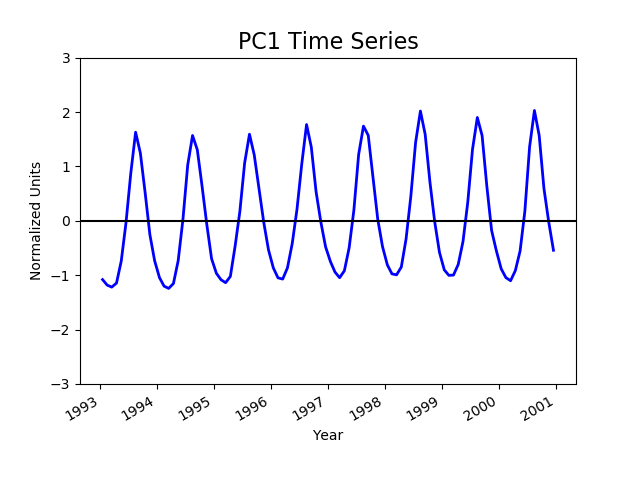

In [51]:
# Set-up to have matplotlib use its jupyter notebook backend
import matplotlib.pyplot as plt
%matplotlib notebook

# Plot the leading EOF
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

<IPython.core.display.Javascript object>


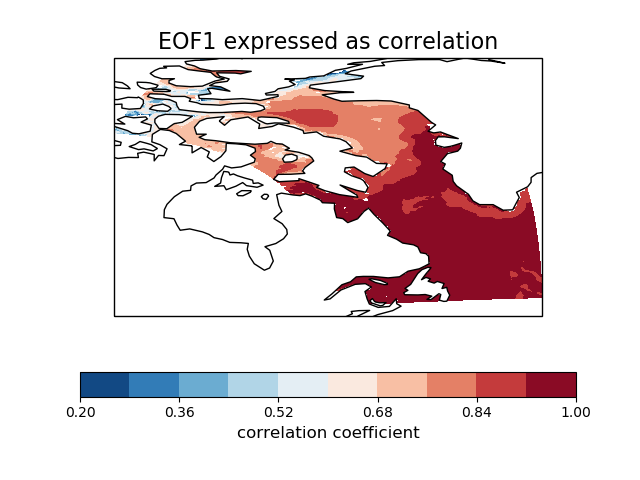

Text(0.5,1,'EOF1 expressed as correlation')

In [66]:
# Essential cartographic library for python. Provides maps for data analysis and visualisation 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

lats = ds['nav_lat'].isel(Time = [0]).squeeze('Time').drop('Time')
lons = ds['nav_lon'].isel(Time = [0]).squeeze('Time').drop('Time')

# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
plt.figure()

clevs = np.linspace(0.2, 1, 11) # color levels
ax = plt.axes(projection=ccrs.PlateCarree())   # Converting into a Cartesian perfect squared grid
fill = ax.contourf(lons, lats, eof1.squeeze(), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')  # Land masking
cb = plt.colorbar(fill, orientation='horizontal')   # Colorbar type and direction
cb.set_label('correlation coefficient', fontsize=12)  
plt.title('EOF1 expressed as correlation', fontsize=16)

Please note this is just an example on how the method works. Details on analysis should be address in another context. 

## References
[1] National Center for Atmospheric Research Staff (Eds). Last modified 22 Jul 2013. "The Climate Data Guide: Empirical Orthogonal Function (EOF) Analysis and Rotated EOF Analysis." Retrieved from https://climatedataguide.ucar.edu/climate-data-tools-and-analysis/empirical-orthogonal-function-eof-analysis-and-rotated-eof-analysis.

[2] National Center for Atmospheric Research Staff (Eds). Last modified 06 Oct 2017. "The Climate Data Guide: Hurrell North Atlantic Oscillation (NAO) Index (PC-based)." Retrieved from https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-pc-based.

[3] Hannachi, A. (2004), A Primer for EOF Analysis of Climate. Data. A. Hannachi. Department of Meteorology, University of Reading. Reading

[4] Chung, C., and S. Nigam (1999), Weighting of geophysical data in Principal Component Analysis, J. Geophys. Res., 104(D14), 16925–16928, doi:10.1029/1999JD900234.

[5] Dawson, A., (2016). eofs: A Library for EOF Analysis of Meteorological, Oceanographic, and Climate Data. Journal of Open Research Software. 4(1), p.e14. DOI: http://doi.org/10.5334/jors.122